In [6]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V || python -V

Python 3.10.12


In [1]:
import numpy as np
import os
import sys
from tqdm import tqdm

# Graphic tool
import matplotlib.pyplot as plt

# Animation tools
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.animation import PillowWriter

# --------------------------------------------------------------------------------------

# Swarm Systems Lab PySimUtils
from ssl_pysimutils import createDir, uniform_distrib, R_2D_matrix

# Python project to path 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the simulator
from dfc import Simulator

# Import the plots
from dfc.plots import plot_basic
from dfc.animations import AnimBasic

# --------------------------------------------------------------------------------------

# Output directory
OUTPUT_PATH = os.path.join("..", "output")

createDir(OUTPUT_PATH)

The directory '../output' already exists!


## Rotation

In [2]:
# Generate the robots distribution and set the initial positions
N = 70
lims = [2, 2]
rc0 = [0, 0]

p0 = uniform_distrib(N=N, lims=lims, rc0=rc0)
p0 = np.vstack([p0, np.array([[3,0],[-3,0]])])

# Generating the simulator class
dt = 0.01
lambda_d = [10, 5]
ke = 0.2

sim = Simulator(p0=p0, dt=dt, lambda_d=lambda_d, ke=ke)

# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 4

R = R_2D_matrix(np.pi*dt)

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.variables["p"][-1] = (R @ sim.variables["p"][-1][:,None]).squeeze()
    sim.variables["p"][-2] = (R @ sim.variables["p"][-2][:,None]).squeeze()
    sim.int_euler()

100%|██████████| 400/400 [00:00<00:00, 1525.25it/s]


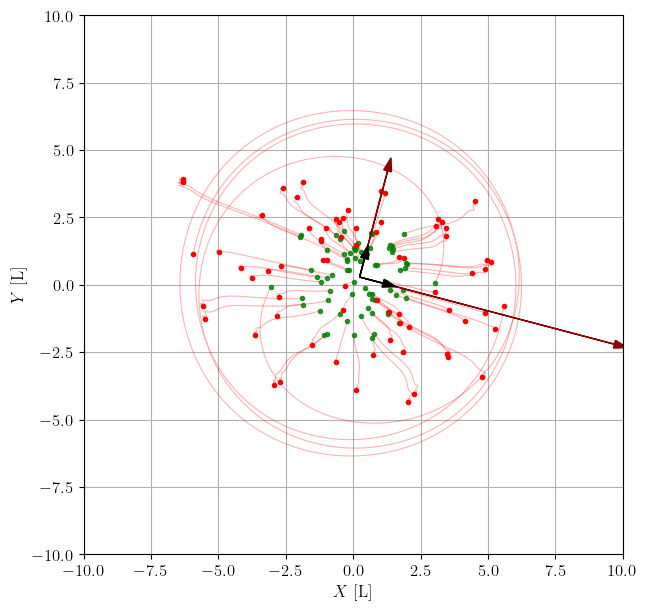

In [3]:
plot_basic(sim, lim=10)

In [4]:
animator = AnimBasic(sim, lim=10)

# -- MP4 
anim = animator.gen_animation()
HTML(anim.to_html5_video()) # It takes a loooot of time...

Simulating 399 frames... 
Progress:


100%|██████████| 399/399 [02:07<00:00,  7.96it/s]

## Stretching

In [21]:
# Generate the robots distribution and set the initial positions
N = 70
lims = [2, 2]
rc0 = [0, 0]

p0 = uniform_distrib(N=N, lims=lims, rc0=rc0)

# Generating the simulator class
dt = 0.05
lambda_d = [10, 5]
ke = 0.2

sim = Simulator(p0=p0, dt=dt, lambda_d=lambda_d, ke=ke)

# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 20

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.variables["p"][-1] = sim.variables["p"][-1] + 3*np.array(sim.variables["v1"])*dt
    sim.variables["p"][-2] = sim.variables["p"][-2] - 3*np.array(sim.variables["v1"])*dt
    sim.int_euler()

100%|██████████| 400/400 [00:00<00:00, 1479.71it/s]


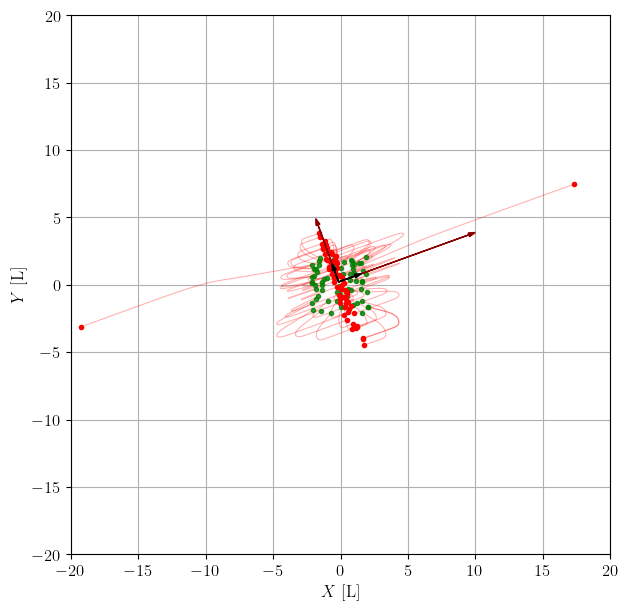

In [22]:
plot_basic(sim, lim=20)

In [ ]:
animator = AnimBasic(sim, lim=20, agent_r=0.15, tail_alpha=0.3)

# -- MP4 
anim = animator.gen_animation()
HTML(anim.to_html5_video()) # It takes a loooot of time...

Simulating 400 frames... 
Progress:


100%|██████████| 400/400 [02:31<00:00,  1.65it/s]